In [1]:
import pyarrow.parquet as pq

# 필요한 컬럼만 로딩
table = pq.read_table("merged_승인매출정보.parquet", columns=["ID", "이용가맹점수"])
df_merchant = table.to_pandas()

# 회원 정보 불러오기
import pandas as pd
df_members = pd.read_parquet("merged_회원정보.parquet")[['ID', 'Segment']]

# 병합
df = pd.merge(df_members, df_merchant, on='ID', how='left')


In [2]:
df

,ID,Segment,이용가맹점수
0,TRAIN_000000,D,6
1,TRAIN_000000,D,5
2,TRAIN_000000,D,6
3,TRAIN_000000,D,7
4,TRAIN_000000,D,6
...,...,...,...
14399995,TRAIN_399999,E,3
14399996,TRAIN_399999,E,6
14399997,TRAIN_399999,E,3
14399998,TRAIN_399999,E,3


In [3]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib as mpl

# 나눔고딕 폰트 설치되어 있으면 경로 설정
plt.rcParams['font.family'] = 'pretendard'  # 또는 
mpl.rcParams['axes.unicode_minus'] = False  # 마이너스(-) 깨짐 방지


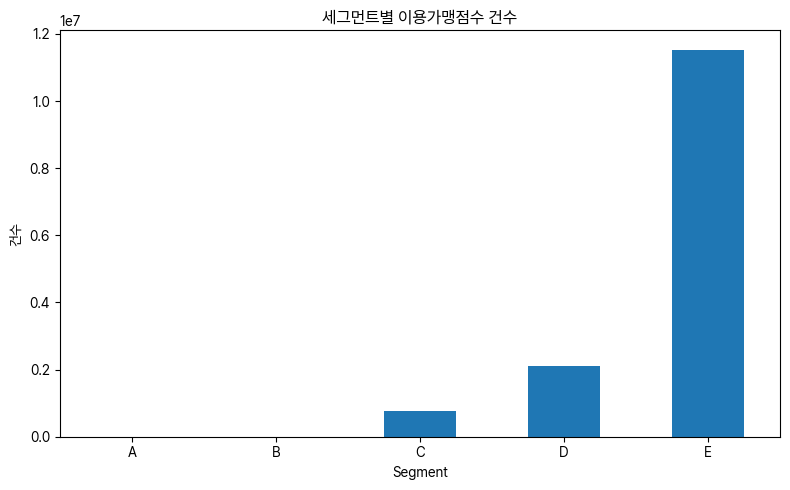

In [4]:
import matplotlib.pyplot as plt

# 이용가맹점수가 결측이 아닌 경우만 필터링
df_valid = df[df['이용가맹점수'].notnull()]

# 세그먼트별 건수 집계
segment_counts = df_valid['Segment'].value_counts().sort_index()

# 시각화
plt.figure(figsize=(8, 5))
segment_counts.plot(kind='bar')
plt.title("세그먼트별 이용가맹점수 건수")
plt.xlabel("Segment")
plt.ylabel("건수")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [5]:
# 이용가맹점수 null 아닌 건만 추출
df_valid = df[df['이용가맹점수'].notnull()]

# 세그먼트별 건수 집계
segment_counts = df_valid['Segment'].value_counts().sort_index()

# 표로 보기 좋게 DataFrame으로 변환
summary_table = segment_counts.reset_index()
summary_table.columns = ['Segment', '이용가맹점수_건수']

print(summary_table)

  Segment  이용가맹점수_건수
0       A       5832
1       B        864
2       C     765540
3       D    2095452
4       E   11532312


A, B 의 이용가맹점수는 매우 낮다 세그먼트 분포와 유사한듯 

In [6]:
import pyarrow.parquet as pq

# 필요한 컬럼만 로딩
table = pq.read_table("merged_승인매출정보.parquet", columns=["ID", "이용금액_해외"])
df_merchant = table.to_pandas()

# 회원 정보 불러오기
import pandas as pd
df_members = pd.read_parquet("merged_회원정보.parquet")[['ID', 'Segment']]

# 병합
df2 = pd.merge(df_members, df_merchant, on='ID', how='left')


In [7]:
df2

,ID,Segment,이용금액_해외
0,TRAIN_000000,D,0
1,TRAIN_000000,D,0
2,TRAIN_000000,D,0
3,TRAIN_000000,D,0
4,TRAIN_000000,D,0
...,...,...,...
14399995,TRAIN_399999,E,0
14399996,TRAIN_399999,E,0
14399997,TRAIN_399999,E,0
14399998,TRAIN_399999,E,0


In [8]:
df2.isnull().sum()

ID         0
Segment    0
이용금액_해외    0
dtype: int64

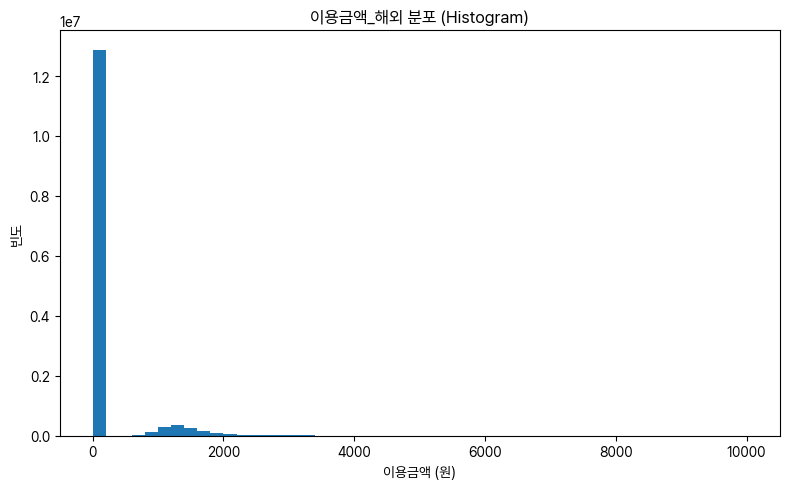

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
df2["이용금액_해외"].dropna().plot(kind='hist', bins=50)
plt.title("이용금액_해외 분포 (Histogram)")
plt.xlabel("이용금액 (원)")
plt.ylabel("빈도")
plt.tight_layout()
plt.show()

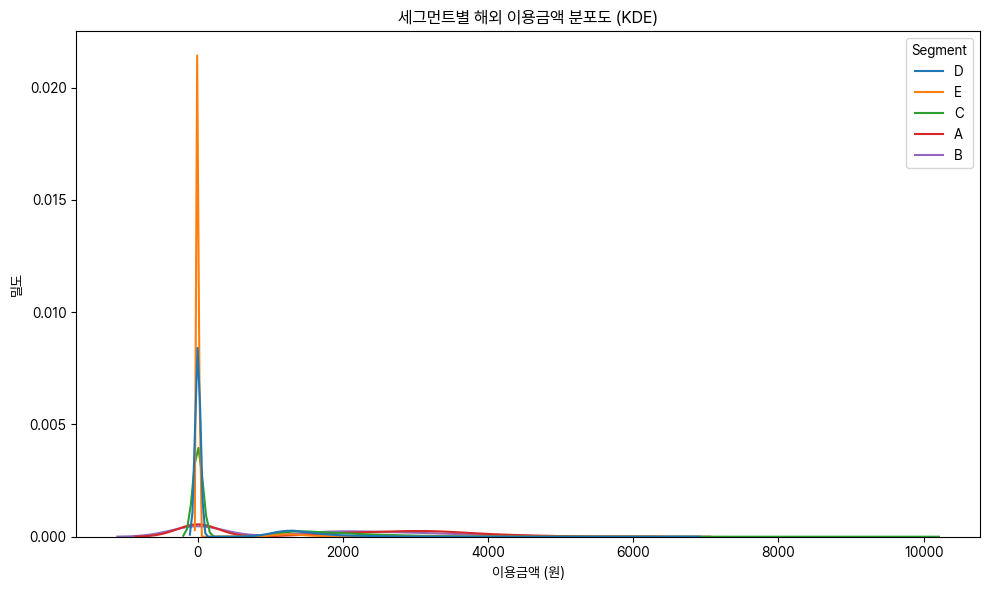

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.kdeplot(data=df2, x="이용금액_해외", hue="Segment", common_norm=False)
plt.title("세그먼트별 해외 이용금액 분포도 (KDE)")
plt.xlabel("이용금액 (원)")
plt.ylabel("밀도")
plt.tight_layout()
plt.show()


In [11]:
min_val = df2["이용금액_해외"].min()
max_val = df2["이용금액_해외"].max()

print("최소값:", min_val)
print("최대값:", max_val)

최소값: 0
최대값: 10011


In [12]:
# 0 이상인 경우 중 0보다 큰 값만 추출
df_nonzero = df2[df2["이용금액_해외"] > 0]

In [13]:
segment_counts = df_nonzero['Segment'].value_counts().sort_index()
print(segment_counts)

Segment
A      3534
B       492
C    253608
D    476538
E    789996
Name: count, dtype: int64


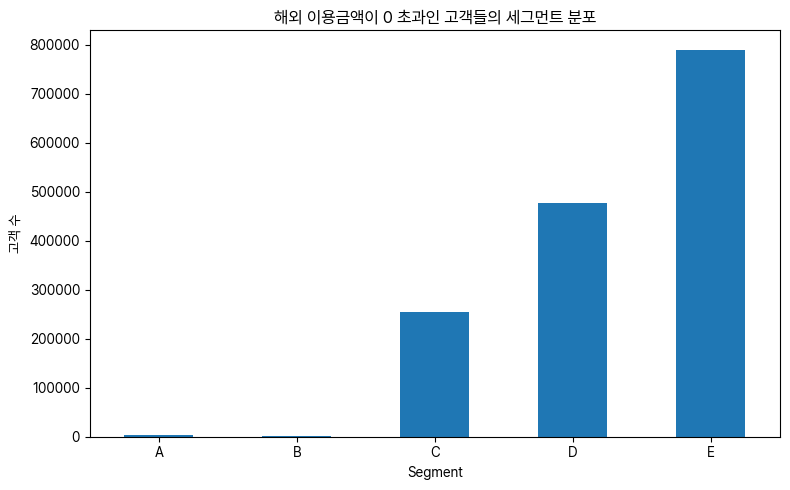

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
segment_counts.plot(kind='bar')
plt.title("해외 이용금액이 0 초과인 고객들의 세그먼트 분포")
plt.xlabel("Segment")
plt.ylabel("고객 수")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [15]:
# 0보다 큰 해외이용금액만 필터링
df_nonzero = df2[df2["이용금액_해외"] > 0]

# 세그먼트별 평균 계산
segment_mean = df_nonzero.groupby("Segment")["이용금액_해외"].mean().round(2)

# 결과 출력
print(segment_mean)

Segment
A    2960.34
B    2547.79
C    1921.03
D    1491.94
E    1366.17
Name: 이용금액_해외, dtype: float64


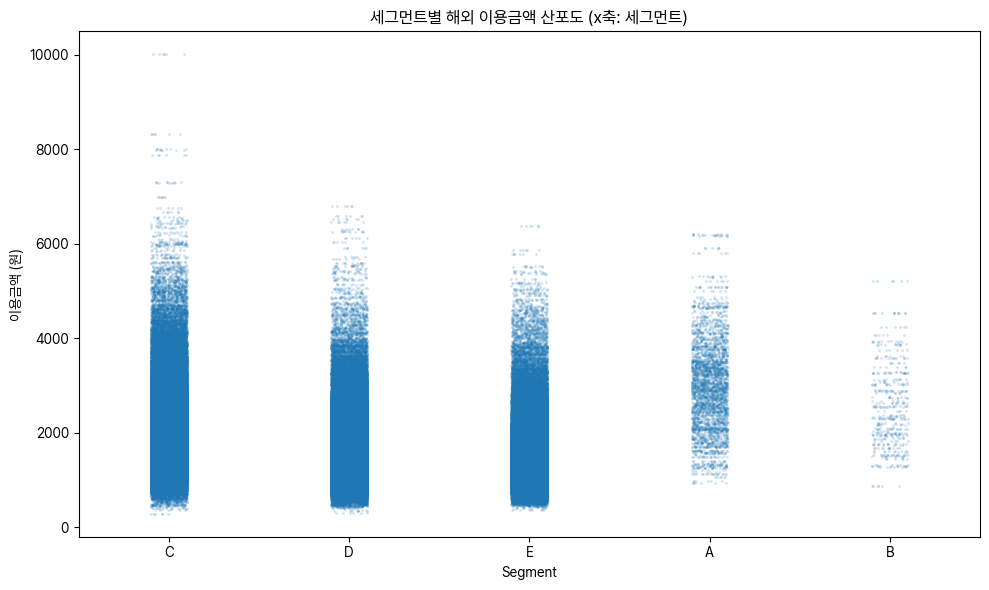

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.stripplot(
    data=df_nonzero,
    x="Segment",
    y="이용금액_해외",
    jitter=True,       # 살짝 흔들어서 겹침 방지
    alpha=0.2,         # 투명도 설정
    size=2             # 점 크기 줄이기
)
plt.title("세그먼트별 해외 이용금액 산포도 (x축: 세그먼트)")
plt.xlabel("Segment")
plt.ylabel("이용금액 (원)")
plt.tight_layout()
plt.show()


In [17]:
# 전체 고객 수 기준 (세그먼트별 그룹화)
total_count = df2.groupby("Segment")["이용금액_해외"].count()

# 0인 고객 수 계산
zero_count = df2[df2["이용금액_해외"] == 0].groupby("Segment")["이용금액_해외"].count()

# 비율 계산
zero_ratio = (zero_count / total_count * 100).round(2)
zero_ratio = zero_ratio.fillna(0)  # 없는 세그먼트는 0으로 처리

# 결과 출력
print(zero_ratio)

Segment
A    39.40
B    43.06
C    66.87
D    77.26
E    93.15
Name: 이용금액_해외, dtype: float64


In [18]:
import pandas as pd

df_merchant = pd.read_parquet("merged_승인매출정보.parquet")

In [19]:
# 쇼핑 / 교통 / 여유 / 납부 컬럼만 추출
category_cols = [col for col in df_merchant.columns if col.startswith(('쇼핑_', '교통_', '여유_', '납부_'))]

# 해당 컬럼만 별도 데이터프레임으로 저장
df_category = df_merchant[category_cols]

In [20]:
summary_stats = df_category.describe().T  # .T로 컬럼을 행으로 바꿔서 보기 좋게

In [21]:
missing_info = pd.DataFrame({
    "결측치_개수": df_category.isnull().sum(),
    "결측치_비율(%)": (df_category.isnull().mean() * 100).round(2)
})

In [22]:
df_summary = summary_stats.merge(missing_info, left_index=True, right_index=True)
df_summary = df_summary.sort_values("결측치_비율(%)", ascending=False)

In [23]:
from IPython.display import display
display(df_summary)

,count,mean,std,min,25%,50%,75%,max,결측치_개수,결측치_비율(%)
쇼핑_도소매_이용금액,2400000.0,521.425870,737.891786,0.0,0.0,0.0,900.0,11493.0,0,0.0
쇼핑_백화점_이용금액,2400000.0,115.023982,278.819776,0.0,0.0,0.0,0.0,2735.0,0,0.0
납부_건강연금이용금액,2400000.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0,0.0
납부_유선방송이용금액,2400000.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0,0.0
납부_보험료이용금액,2400000.0,218.399548,650.664159,0.0,0.0,0.0,0.0,5493.0,0,0.0
납부_가스전기료이용금액,2400000.0,12.627681,87.142140,0.0,0.0,0.0,0.0,984.0,0,0.0
납부_렌탈료이용금액,2400000.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0,0.0
납부_관리비이용금액,2400000.0,143.804288,810.527506,0.0,0.0,0.0,0.0,5519.0,0,0.0
납부_통신비이용금액,2400000.0,605.730487,1053.696788,0.0,0.0,0.0,1229.0,9305.0,0,0.0
여유_기타이용금액,2400000.0,7.562275,40.677477,0.0,0.0,0.0,0.0,427.0,0,0.0


In [24]:
df_merchant = pd.read_parquet("merged_승인매출정보.parquet")
df_members = pd.read_parquet("merged_회원정보.parquet")[['ID', 'Segment']]

In [25]:
category_cols = [col for col in df_merchant.columns if col.startswith(('쇼핑_', '교통_', '여유_', '납부_'))]
category_cols.insert(0, 'ID')
df_selected = df_merchant[category_cols]

In [26]:
df_merchant_dedup = df_merchant.drop_duplicates(subset='ID')

In [27]:
df_members['ID'].nunique(), df_members.shape[0]

(400000, 2400000)

In [28]:
df_merchant_grouped = df_merchant.groupby('ID').mean(numeric_only=True).reset_index()

In [29]:
df_members_unique = df_members.drop_duplicates(subset='ID')

In [30]:
df_merged = pd.merge(df_members_unique, df_merchant_grouped, on='ID', how='left')
print(df_merged.shape)  # (400,000, ~)

(400000, 390)


In [31]:
print("회원정보 고유 ID 수:", df_members['ID'].nunique())
print("승인매출 고유 ID 수:", df_merchant['ID'].nunique())

print("병합 전 회원 수:", df_members.shape[0])
print("병합 후 고객 수:", df_merged['ID'].nunique())

회원정보 고유 ID 수: 400000
승인매출 고유 ID 수: 400000
병합 전 회원 수: 2400000
병합 후 고객 수: 400000


In [32]:
# '쇼핑_'으로 시작하는 컬럼명만 추출
shopping_cols = [col for col in df_merged.columns if col.startswith('쇼핑_')]

In [33]:
# Segment 기준으로 그룹화하여 쇼핑 관련 컬럼 평균 계산
segment_shopping_avg = df_merged.groupby('Segment')[shopping_cols].mean().round(2)

In [34]:
from IPython.display import display
display(segment_shopping_avg)

,쇼핑_도소매_이용금액,쇼핑_백화점_이용금액,쇼핑_마트_이용금액,쇼핑_슈퍼마켓_이용금액,쇼핑_편의점_이용금액,쇼핑_아울렛_이용금액,쇼핑_온라인_이용금액,쇼핑_기타_이용금액
Segment,,,,,,,,
A,3362.43,793.31,1581.11,1321.74,610.94,179.85,13983.23,316.15
B,3485.98,737.90,1628.54,1319.32,780.56,250.78,18167.07,397.47
C,1578.06,361.88,1037.42,873.17,471.95,119.58,6344.84,204.51
D,971.52,220.36,717.37,653.92,368.26,86.04,3792.27,157.60
E,367.84,79.11,250.03,254.54,119.51,31.23,908.60,64.24


<Figure size 1400x600 with 0 Axes>

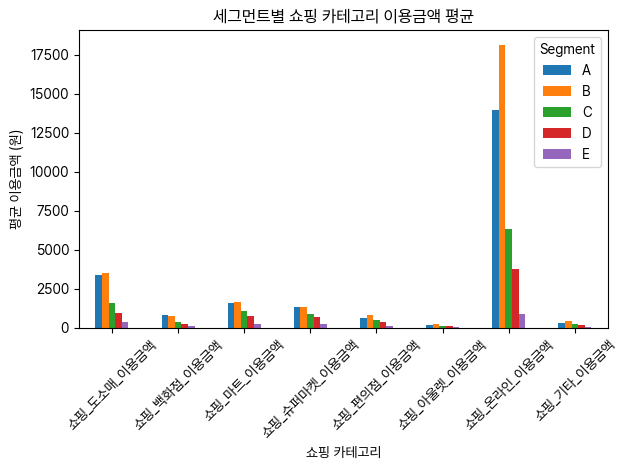

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
segment_shopping_avg.T.plot(kind='bar')
plt.title("세그먼트별 쇼핑 카테고리 이용금액 평균")
plt.xlabel("쇼핑 카테고리")
plt.ylabel("평균 이용금액 (원)")
plt.xticks(rotation=45)
plt.legend(title='Segment')
plt.tight_layout()
plt.show()

In [36]:
# Segment A, B 고객 중에서
df_ab = df_merged[df_merged['Segment'].isin(['A', 'B', 'C', 'D', 'E'])].copy()

# 특정 쇼핑 항목 기준 상위 정렬
top_online = df_ab.sort_values(by='쇼핑_온라인_이용금액', ascending=False)

# 상위 10명 확인
top_online[['ID', 'Segment', '쇼핑_온라인_이용금액']].head(10)

,ID,Segment,쇼핑_온라인_이용금액
112288,TRAIN_112288,D,79346.666667
277535,TRAIN_277535,C,78574.833333
392885,TRAIN_392885,C,75815.500000
69512,TRAIN_069512,A,71957.500000
154623,TRAIN_154623,C,69806.666667
286241,TRAIN_286241,C,69791.166667
136628,TRAIN_136628,C,68918.333333
64957,TRAIN_064957,C,68313.500000
33319,TRAIN_033319,E,67614.666667
294075,TRAIN_294075,C,66915.166667


In [37]:
import pandas as pd

# 쇼핑 컬럼만 추출
shopping_cols = [col for col in df_merged.columns if col.startswith('쇼핑_')]

# 쇼핑 데이터만 추출 + melt
df_shopping_long = df_merged[['ID', 'Segment'] + shopping_cols].melt(
    id_vars=['ID', 'Segment'],
    value_vars=shopping_cols,
    var_name='쇼핑항목',
    value_name='이용금액'
)

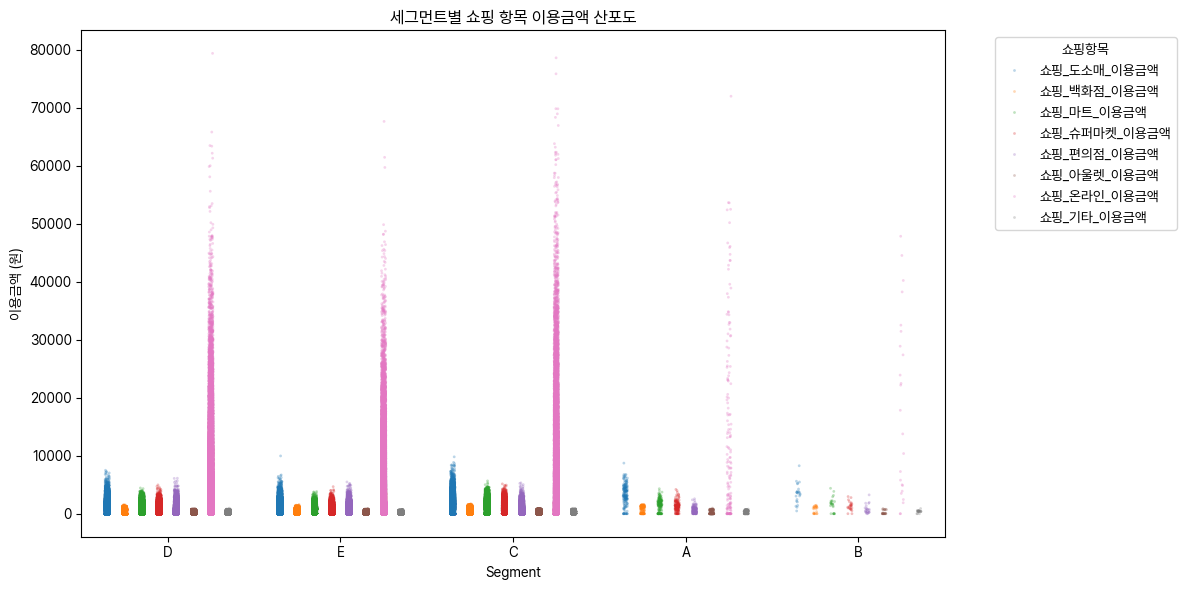

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.stripplot(
    data=df_shopping_long,
    x='Segment',
    y='이용금액',
    hue='쇼핑항목',
    jitter=True,
    alpha=0.3,
    size=2,
    dodge=True  # 색상별로 좌우로 살짝 분리
)
plt.title("세그먼트별 쇼핑 항목 이용금액 산포도")
plt.xlabel("Segment")
plt.ylabel("이용금액 (원)")
plt.legend(title='쇼핑항목', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# 교통

In [39]:
# 1. 교통 컬럼 추출
transport_cols = [col for col in df_merged.columns if col.startswith('교통_')]

# 2. 세그먼트별 평균 계산
segment_transport_avg = df_merged.groupby('Segment')[transport_cols].mean().round(2)

# 3. 결과 출력
from IPython.display import display
display(segment_transport_avg)

,교통_주유이용금액,교통_정비이용금액,교통_통행료이용금액,교통_버스지하철이용금액,교통_택시이용금액,교통_철도버스이용금액
Segment,,,,,,
A,2507.47,449.21,0.00,284.06,210.86,174.74
B,2315.81,373.19,0.00,233.12,213.93,156.05
C,1814.55,297.38,0.05,267.74,134.82,112.54
D,1313.26,197.45,0.02,253.99,106.24,82.26
E,422.62,66.09,0.01,126.14,41.63,29.93


In [40]:
# E : 주유나 정비 이용금액이 매우 적은편 >>>>>>> >?  학생 ?? ( 신용카드 발급여부 확인해봐야할 듯 ? )

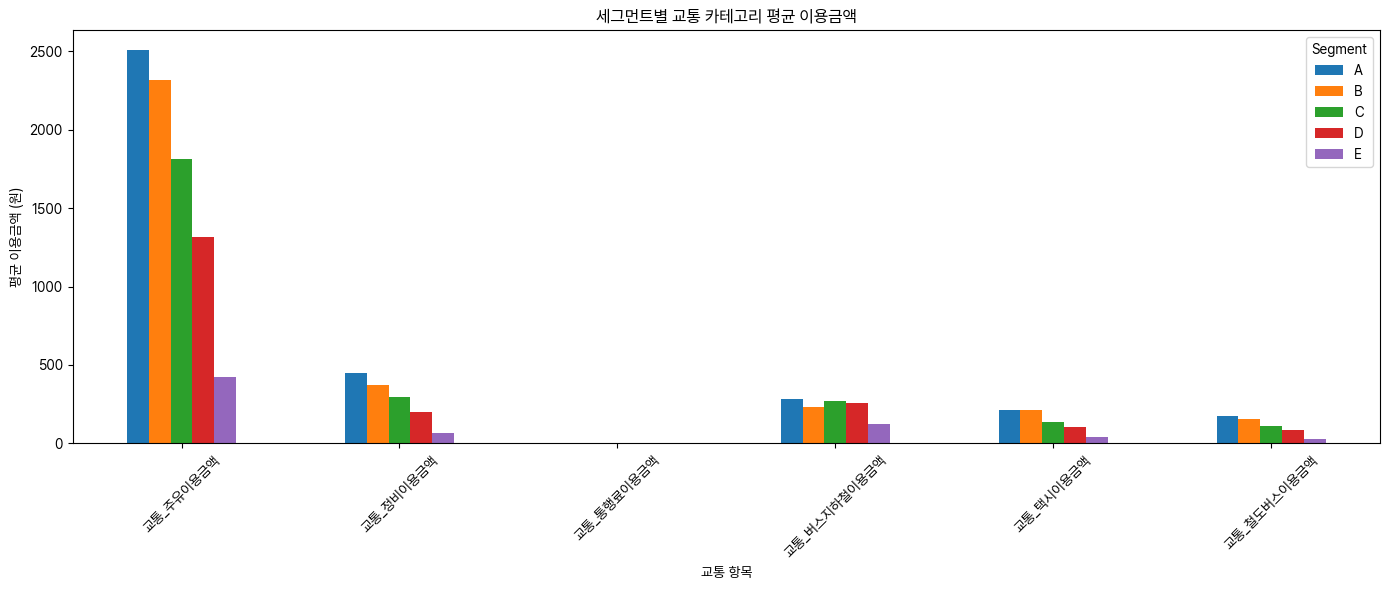

In [41]:
import matplotlib.pyplot as plt

segment_transport_avg.T.plot(kind='bar', figsize=(14, 6))
plt.title("세그먼트별 교통 카테고리 평균 이용금액")
plt.xlabel("교통 항목")
plt.ylabel("평균 이용금액 (원)")
plt.xticks(rotation=45)
plt.legend(title='Segment')
plt.tight_layout()
plt.show()


In [42]:
# 1. 교통 항목 컬럼 추출
transport_cols = [col for col in df_merged.columns if col.startswith('교통_')]

# 2. 항목별로 상위 5명씩 정렬하여 출력
for col in transport_cols:
    print(f"\n📌 {col} 상위 10명")
    display(
        df_merged.sort_values(by=col, ascending=False)[['ID', 'Segment', col]].head(10)
    )



📌 교통_주유이용금액 상위 10명


,ID,Segment,교통_주유이용금액
273176,TRAIN_273176,D,10744.500000
312124,TRAIN_312124,C,10649.000000
146577,TRAIN_146577,C,10342.333333
111204,TRAIN_111204,C,10337.833333
27795,TRAIN_027795,C,10157.666667
390714,TRAIN_390714,C,10027.333333
284779,TRAIN_284779,C,9935.000000
233216,TRAIN_233216,C,9811.666667
141872,TRAIN_141872,C,9793.500000
160671,TRAIN_160671,C,9782.666667



📌 교통_정비이용금액 상위 10명


,ID,Segment,교통_정비이용금액
307960,TRAIN_307960,C,1649.333333
123881,TRAIN_123881,C,1541.666667
347448,TRAIN_347448,C,1487.666667
311786,TRAIN_311786,D,1450.333333
297014,TRAIN_297014,E,1439.166667
7377,TRAIN_007377,E,1426.000000
159187,TRAIN_159187,C,1409.166667
63091,TRAIN_063091,C,1395.666667
219406,TRAIN_219406,C,1387.500000
381104,TRAIN_381104,E,1377.666667



📌 교통_통행료이용금액 상위 10명


,ID,Segment,교통_통행료이용금액
264147,TRAIN_264147,C,143.666667
263633,TRAIN_263633,E,139.000000
316788,TRAIN_316788,D,138.333333
378657,TRAIN_378657,C,102.166667
34661,TRAIN_034661,C,100.000000
221068,TRAIN_221068,E,98.666667
267243,TRAIN_267243,E,98.666667
70094,TRAIN_070094,E,96.666667
250766,TRAIN_250766,C,95.333333
84252,TRAIN_084252,E,95.000000



📌 교통_버스지하철이용금액 상위 10명


,ID,Segment,교통_버스지하철이용금액
136225,TRAIN_136225,E,2024.333333
112596,TRAIN_112596,E,2018.666667
386633,TRAIN_386633,D,2012.166667
290019,TRAIN_290019,E,1950.000000
14881,TRAIN_014881,E,1948.000000
257918,TRAIN_257918,E,1946.500000
208538,TRAIN_208538,E,1943.833333
63159,TRAIN_063159,D,1943.000000
213788,TRAIN_213788,E,1942.333333
283164,TRAIN_283164,E,1941.166667



📌 교통_택시이용금액 상위 10명


,ID,Segment,교통_택시이용금액
323334,TRAIN_323334,E,772.333333
231681,TRAIN_231681,C,756.500000
263860,TRAIN_263860,E,756.500000
320168,TRAIN_320168,D,741.166667
320142,TRAIN_320142,D,737.166667
277586,TRAIN_277586,E,732.000000
294655,TRAIN_294655,D,731.166667
222156,TRAIN_222156,D,714.500000
398789,TRAIN_398789,D,712.166667
186458,TRAIN_186458,D,712.166667



📌 교통_철도버스이용금액 상위 10명


,ID,Segment,교통_철도버스이용금액
232139,TRAIN_232139,C,883.000000
57737,TRAIN_057737,A,760.166667
89293,TRAIN_089293,C,755.333333
397214,TRAIN_397214,C,746.000000
216616,TRAIN_216616,D,740.000000
47005,TRAIN_047005,C,739.500000
254141,TRAIN_254141,C,737.833333
178124,TRAIN_178124,E,731.166667
189177,TRAIN_189177,C,730.500000
120163,TRAIN_120163,C,724.166667


In [43]:
# 교통 항목만 추출
transport_cols = [col for col in df_merged.columns if col.startswith('교통_')]

# long 포맷으로 변환
df_transport_long = df_merged[['ID', 'Segment'] + transport_cols].melt(
    id_vars=['ID', 'Segment'],
    value_vars=transport_cols,
    var_name='교통항목',
    value_name='이용금액'
)

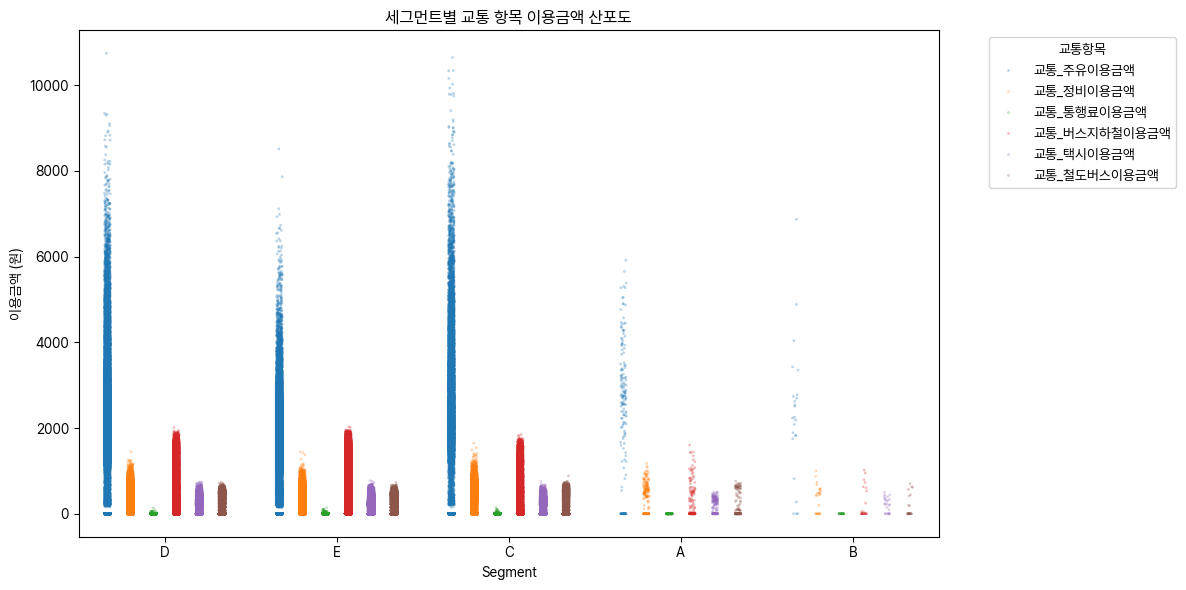

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.stripplot(
    data=df_transport_long,
    x='Segment',
    y='이용금액',
    hue='교통항목',
    jitter=True,
    alpha=0.3,
    dodge=True,
    size=2
)
plt.title("세그먼트별 교통 항목 이용금액 산포도")
plt.xlabel("Segment")
plt.ylabel("이용금액 (원)")
plt.legend(title='교통항목', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [45]:
# 각 카테고리 컬럼들 분류
shopping_cols = [col for col in df_merged.columns if col.startswith('쇼핑_')]
transport_cols = [col for col in df_merged.columns if col.startswith('교통_')]
leisure_cols  = [col for col in df_merged.columns if col.startswith('여유_')]
payment_cols  = [col for col in df_merged.columns if col.startswith('납부_')]

In [46]:
df = df_merged.copy()
df["쇼핑_합계"] = df[shopping_cols].sum(axis=1)
df["교통_합계"] = df[transport_cols].sum(axis=1)
df["여유_합계"]  = df[leisure_cols].sum(axis=1)
df["납부_합계"]  = df[payment_cols].sum(axis=1)

# 전체 소비 합계
df["총소비"] = df[["쇼핑_합계", "교통_합계", "여유_합계", "납부_합계"]].sum(axis=1)

In [47]:
df["쇼핑_비율"] = (df["쇼핑_합계"] / df["총소비"]) * 100
df["교통_비율"] = (df["교통_합계"] / df["총소비"]) * 100
df["여유_비율"]  = (df["여유_합계"] / df["총소비"]) * 100
df["납부_비율"]  = (df["납부_합계"] / df["총소비"]) * 100

In [48]:
segment_ratio = df.groupby("Segment")[["쇼핑_비율", "교통_비율", "여유_비율", "납부_비율"]].mean().round(2)
display(segment_ratio)

,쇼핑_비율,교통_비율,여유_비율,납부_비율
Segment,,,,
A,67.43,15.64,5.41,11.52
B,74.21,10.23,4.00,11.57
C,60.64,19.97,3.47,15.92
D,57.26,21.25,2.86,18.63
E,47.53,21.03,2.23,29.20


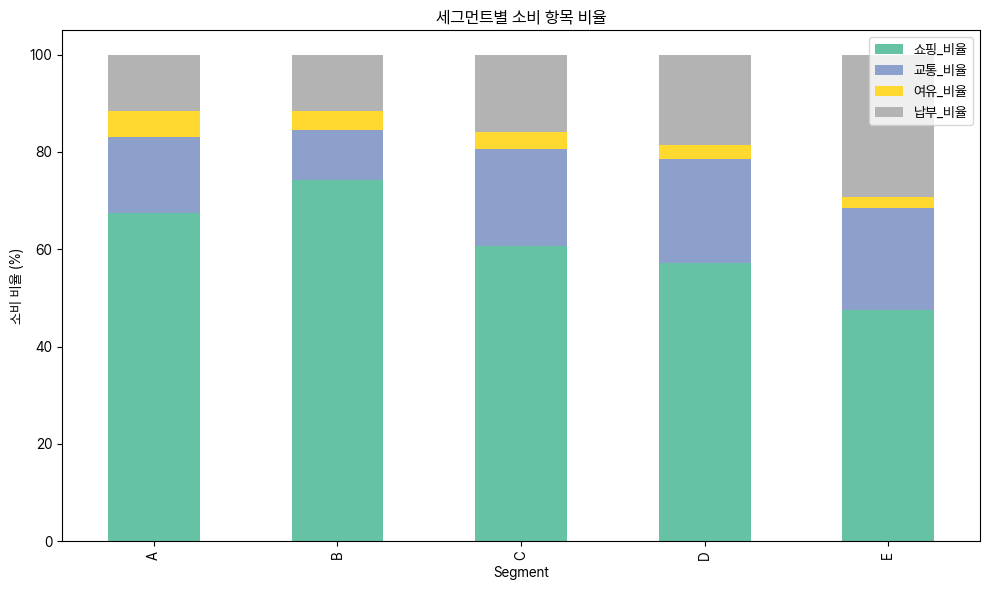

In [49]:
segment_ratio.plot(kind="bar", stacked=True, figsize=(10, 6), colormap="Set2")
plt.title("세그먼트별 소비 항목 비율")
plt.ylabel("소비 비율 (%)")
plt.xlabel("Segment")
plt.legend(loc="upper right")
plt.tight_layout()
plt.show()

- A : E에 비해 여유비율 있음. 
- A, B : 쇼핑 비율 높음
(라이프스타일 소비층)

- E : 납부비율 : 가장 큰 비중 차지. 체크카드 + 생계 중심 소비층. 소득 여력 낮을 가능성 있음

In [50]:
import pandas as pd

# 1. Segment 숫자 인코딩
df_corr = df_merged.copy()
df_corr['Segment_num'] = df_corr['Segment'].astype('category').cat.codes

# 2. 카테고리별 컬럼 분류
shopping_cols = [col for col in df_corr.columns if col.startswith('쇼핑_')]
transport_cols = [col for col in df_corr.columns if col.startswith('교통_')]
leisure_cols  = [col for col in df_corr.columns if col.startswith('여유_')]
payment_cols  = [col for col in df_corr.columns if col.startswith('납부_')]

# 3. 각 카테고리별로 상관계수 계산
def compute_correlations(cols):
    corrs = df_corr[cols + ['Segment_num']].corr()['Segment_num'].drop('Segment_num')
    return corrs.sort_values(ascending=False)

shopping_corr = compute_correlations(shopping_cols)
transport_corr = compute_correlations(transport_cols)
leisure_corr  = compute_correlations(leisure_cols)
payment_corr  = compute_correlations(payment_cols)

In [52]:
from sklearn.feature_selection import f_classif
import pandas as pd

# 카테고리별 컬럼 추출
shopping_cols = [col for col in df_merged.columns if col.startswith("쇼핑_")]
transport_cols = [col for col in df_merged.columns if col.startswith("교통_")]
leisure_cols  = [col for col in df_merged.columns if col.startswith("여유_")]
payment_cols  = [col for col in df_merged.columns if col.startswith("납부_")]

# 전체 분석 대상 컬럼
all_cols = shopping_cols + transport_cols + leisure_cols + payment_cols

# X, y 설정
X = df_merged[all_cols].fillna(0)
y = df_merged['Segment']

# ANOVA F-Score 계산
f_scores, p_values = f_classif(X, y)

# 결과 정리
anova_result = pd.DataFrame({
    'Feature': all_cols,
    'F_score': f_scores,
    'p_value': p_values
}).sort_values('F_score', ascending=False)

# 상위 10개 출력
anova_result.head(10)

c:\Users\somee\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [19 24 27 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\somee\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


,Feature,F_score,p_value
0,쇼핑_도소매_이용금액,27482.827295,0.0
2,쇼핑_마트_이용금액,19823.624022,0.0
3,쇼핑_슈퍼마켓_이용금액,19579.309743,0.0
8,교통_주유이용금액,18818.070538,0.0
6,쇼핑_온라인_이용금액,15882.185058,0.0
9,교통_정비이용금액,13744.566430,0.0
4,쇼핑_편의점_이용금액,13139.403994,0.0
29,납부_기타이용금액,12757.673800,0.0
7,쇼핑_기타_이용금액,10440.028119,0.0
1,쇼핑_백화점_이용금액,9340.332197,0.0


In [56]:
from sklearn.feature_selection import f_classif
import pandas as pd

# Segment A vs Others
df_bin = df_merged.copy()
df_bin['A_vs_rest'] = df_bin['Segment'].apply(lambda x: 1 if x == 'A' else 0)

# 분석 컬럼 설정
cols = [col for col in df_bin.columns if col.startswith(('쇼핑_', '교통_', '여유_', '납부_'))]
X = df_bin[cols].fillna(0)
y = df_bin['A_vs_rest']

# F-score 계산
f_scores, p_values = f_classif(X, y)
result_a = pd.DataFrame({
    'Feature': cols,
    'F_score': f_scores,
    'p_value': p_values
}).sort_values('F_score', ascending=False)

result_a.head(10)


c:\Users\somee\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [19 24 27 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\somee\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


,Feature,F_score,p_value
18,여유_숙박이용금액,3150.271498,0.000000e+00
0,쇼핑_도소매_이용금액,2544.746324,0.000000e+00
29,납부_기타이용금액,2115.112052,0.000000e+00
20,여유_항공이용금액,1985.536846,0.000000e+00
6,쇼핑_온라인_이용금액,1444.741474,1.465896e-315
14,여유_운동이용금액,1047.719663,1.513483e-229
1,쇼핑_백화점_이용금액,1047.440393,1.739880e-229
2,쇼핑_마트_이용금액,749.940908,5.876579e-165
3,쇼핑_슈퍼마켓_이용금액,708.611809,5.489658e-156
9,교통_정비이용금액,547.985522,4.168251e-121


In [57]:
segment_list = ['A', 'B', 'C', 'D', 'E']
results = {}

for seg in segment_list:
    df_bin = df_merged.copy()
    df_bin[f'{seg}_vs_rest'] = df_bin['Segment'].apply(lambda x: 1 if x == seg else 0)
    
    X = df_bin[cols].fillna(0)
    y = df_bin[f'{seg}_vs_rest']
    
    f_scores, p_values = f_classif(X, y)
    
    results[seg] = pd.DataFrame({
        'Feature': cols,
        'F_score': f_scores,
        'p_value': p_values
    }).sort_values('F_score', ascending=False)


c:\Users\somee\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [19 24 27 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\somee\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
c:\Users\somee\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [19 24 27 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\somee\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
c:\Users\somee\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [19 24 27 28] are constant.
  warnings.warn("Features %s are constant." % constant_

In [59]:
# 만약 이렇게 저장되어 있다면:
# results = {'A': result_a, 'B': result_b, 'C': result_c, 'D': result_d, 'E': result_e}

for seg, df in results.items():
    print(f"\n📌 Segment {seg} vs 나머지 (Top 5)")
    display(df.head(5))


📌 Segment A vs 나머지 (Top 5)


,Feature,F_score,p_value
18,여유_숙박이용금액,3150.271498,0.000000e+00
0,쇼핑_도소매_이용금액,2544.746324,0.000000e+00
29,납부_기타이용금액,2115.112052,0.000000e+00
20,여유_항공이용금액,1985.536846,0.000000e+00
6,쇼핑_온라인_이용금액,1444.741474,1.465896e-315



📌 Segment B vs 나머지 (Top 5)


,Feature,F_score,p_value
18,여유_숙박이용금액,713.439165,4.916894e-157
20,여유_항공이용금액,551.991521,5.619309e-122
0,쇼핑_도소매_이용금액,408.182229,1.012105e-90
6,쇼핑_온라인_이용금액,382.320037,4.262986e-85
29,납부_기타이용금액,277.987828,2.163742e-62



📌 Segment C vs 나머지 (Top 5)


,Feature,F_score,p_value
0,쇼핑_도소매_이용금액,55156.712008,0.0
2,쇼핑_마트_이용금액,34667.512058,0.0
6,쇼핑_온라인_이용금액,31393.789147,0.0
3,쇼핑_슈퍼마켓_이용금액,30815.739674,0.0
8,교통_주유이용금액,30205.551116,0.0



📌 Segment D vs 나머지 (Top 5)


,Feature,F_score,p_value
3,쇼핑_슈퍼마켓_이용금액,31970.103340,0.0
8,교통_주유이용금액,30616.672360,0.0
2,쇼핑_마트_이용금액,28830.275899,0.0
0,쇼핑_도소매_이용금액,28582.732951,0.0
4,쇼핑_편의점_이용금액,24815.111079,0.0



📌 Segment E vs 나머지 (Top 5)


,Feature,F_score,p_value
0,쇼핑_도소매_이용금액,89818.232674,0.0
3,쇼핑_슈퍼마켓_이용금액,73017.902707,0.0
2,쇼핑_마트_이용금액,71804.452958,0.0
8,교통_주유이용금액,70177.037753,0.0
6,쇼핑_온라인_이용금액,54301.376310,0.0


## 세그먼트별 Top 분류 변수 해석

### ✅ Segment A
- 여유_숙박, 항공, 온라인 소비
- 여가/여행 중심, 프리미엄 사용자층

### ✅ Segment B
- A와 유사하나 소비 규모는 조금 낮음
- 여유 소비 + 납부 항목도 일부 포함

### ✅ Segment C, D
- 쇼핑(마트, 슈퍼마켓), 주유 등 실생활 소비 중심
- D는 편의점 중심 등 소액 반복 소비 많음

### ✅ Segment E
- 모든 소비 영역에서 금액이 매우 낮음
- 고정비(납부) 외에는 거의 없음
- “체크카드 학생층 / 비활성 사용자 / 생계 위주”

→ 각 세그먼트별 주요 특성이 변수 수준에서 분명히 구분됨
→ 머신러닝 예측, 마케팅 타겟, 고객 인사이트 전략에 활용 가능